In [95]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
sns.set(style = 'darkgrid')

In [96]:
phases = ct.import_phases('KOH.cti', ['K_solid', 'K_liquid', 'KOH_a', 'KOH_b',
                                      'KOH_liquid', 'K2O2_solid', 'K2O_solid',
                                      'KO2_solid', 'ice', 'liquid_water',
                                      'KOH_plasma'])

# create the Mixture object from the list of phases
mix = ct.Mixture(phases)

def hydrogenDis(minTemp, maxTemp, step, pressure):
    fileName = '{} Pa.csv'.format(pressure)
    x = np.arange(minTemp, maxTemp+1, step) #Creates row vector of input temperatures
    y = []  
    z = []
    a = []
    #csvfile = open(fileName, 'w')
    #writer = csv.writer(csvfile)
    #writer.writerow(['T'] + mix.species_names)
    for i in range(len(x)):               #For each temperature input
        mix.T = x[i]
        mix.P = pressure
        mix.species_moles = "K: 0.0000000000001, H2: 1, O2: 0.0000000000001"
        mix.equilibrate("TP", max_steps=100000, log_level=0)  #create a gas mixture with given temperature, constant              #pressure of 1 atm and initial mole fraction of H2 = 1,
        total = np.sum([mix.species_moles[11], mix.species_moles[12], mix.species_moles[15]])
        y.append(mix.species_moles[11]/total)         #then equilibrate mixture and append equilibrated mole fraction 
        z.append(mix.species_moles[12]/total)  
        a.append(mix.species_moles[15]/total)         #of H to array y
        #writer.writerow([x[i]] + list(mix.species_moles))
    
    sns.lineplot(x,y, label = 'H').set_title('Hyrdogen Dissociation vs Temperature at {} Pa'.format(pressure))
    sns.lineplot(x,z, label = 'H+')
    sns.lineplot(x,a, label = 'H2')
    

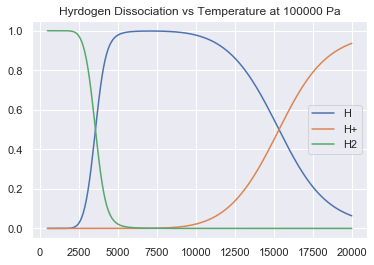

In [97]:
hydrogenDis(500, 20000, 100, 100000)


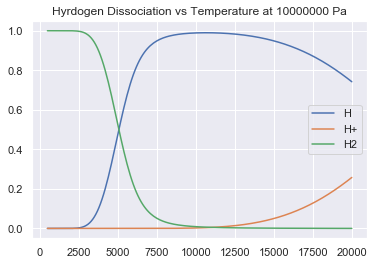

In [98]:
hydrogenDis(500, 20000, 100, 10000000)

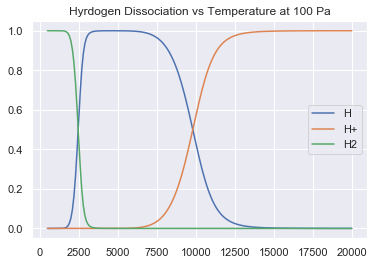

In [99]:
hydrogenDis(500, 20000, 100, 100)